# Sentiment Analysis of Financial News Using NLTK

We have to predict the sentiment of fiancial news using nltk

#About Dataset

This dataset contains 3 csv file

cnbc headline   (3080, 3)

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)


# Columns Provided in the Dataset

cnbc headline
1. time
2. headlines
3. Description

gaurdian headline
1. time
2. headline

reuters headline
1. time
2. headline
3. description


# What is NLTK ?

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.


https://medium.com/@ODSC/intro-to-language-processing-with-the-nltk-59aa26b9d056



# What is sentiment analysis ?

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.



https://monkeylearn.com/sentiment-analysis/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import all the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
#import stopwords and text processing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer


In [57]:
#import machine learning libraries

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import plotly.express as px
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('all')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading pack

KeyboardInterrupt: ignored

In [4]:
from google.colab import files


uploaded = files.upload()


Saving cnbc_headlines.csv to cnbc_headlines.csv


# Basic EDA on cnbc_headlines dataset

In [5]:
# Read csv file of cnbc headlines using pandas
data=pd.read_csv('cnbc_headlines.csv')

In [6]:
data.head().style.background_gradient(cmap='winter')

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covid-19 vaccine gold rush,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying four companies that are supporting vaccine developers."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightning round bell, which means he's giving his answers to callers' stock questions at rapid speed."
2,nan,nan,nan
3,"Cramer's week ahead: Big week for earnings, even bigger week for vaccines","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Covid companies if The Lancet publishes some good news from AstraZeneca's vaccine trial,"" Cramer said."
4,IQ Capital CEO Keith Bliss says tech and healthcare will rally,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Bell"" to talk about the broader markets, including the performance of the S&P 500 and the Nasdaq."


In [7]:
# check the shape of cnbc headline dataset
data.shape

(3080, 3)

In [8]:
# Check all the columns in the cnbc headline dataset
data.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [9]:
# Check which columns are having categorical, numerical or boolean values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [10]:
# Check for missing values in all the columnns of cnbc headline dataset
data.isna().sum()

Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time

In [11]:
 # drop nan values in cnbc headline dataset
data.dropna(inplace=True)

In [14]:
# drop the duplicate rows in the dataset keep the first one
data.drop_duplicates(inplace=True)
data.head().style.background_gradient(cmap='jet')

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covid-19 vaccine gold rush,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying four companies that are supporting vaccine developers."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightning round bell, which means he's giving his answers to callers' stock questions at rapid speed."
3,"Cramer's week ahead: Big week for earnings, even bigger week for vaccines","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Covid companies if The Lancet publishes some good news from AstraZeneca's vaccine trial,"" Cramer said."
4,IQ Capital CEO Keith Bliss says tech and healthcare will rally,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Bell"" to talk about the broader markets, including the performance of the S&P 500 and the Nasdaq."
5,"Wall Street delivered the 'kind of pullback I've been waiting for,' Jim Cramer says","7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies that are going lower even though they deserve to go higher,"" the ""Mad Money"" host advised."


In [15]:
# check the shape of cnbc headline dataset
data.shape

(2800, 3)

# Basic EDA on Gaurdian headlines dataset

In [16]:
from google.colab import files


uploaded = files.upload()


Saving guardian_headlines.csv to guardian_headlines.csv


In [17]:
# Read csv file of gaurdian headlines using pandas
gurdian=pd.read_csv('guardian_headlines.csv')

In [18]:
gurdian.head().style.background_gradient(cmap='Reds')

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of working life upended by Covid-19
2,18-Jul-20,Five key areas Sunak must tackle to serve up economic recovery
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ for no-deal Brexit
4,18-Jul-20,The Week in Patriarchy Bacardi's 'lady vodka': the latest in a long line of depressing gendered products


In [19]:
#check the shape of gaurdian headline dataset
gurdian.shape

(17800, 2)

In [20]:
#check columns of gaurdian headline
gurdian.columns

Index(['Time', 'Headlines'], dtype='object')

In [21]:
# Check which columns are having categorical, numerical or boolean values
gurdian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [22]:
# check null values in gaurdian headlines dataset
gurdian.isna().sum()

Time         0
Headlines    0
dtype: int64

In [23]:
# drop duplicate rows in headlines and keep the first one
gurdian.drop_duplicates(inplace=True)
gurdian.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


# Basic EDA on reuters headlines

In [24]:
from google.colab import files


uploaded = files.upload()


Saving reuters_headlines.csv to reuters_headlines.csv


In [25]:
# Read csv file of reuters headlines using using pandas
reuters=pd.read_csv('reuters_headlines.csv')

In [26]:
reuters.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [27]:
#check the shape of reuters headlines dataset
reuters.shape

(32770, 3)

In [28]:
#check the columns of reuters headline dataset
reuters.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [29]:
# Check which columns are having categorical, numerical or boolean values
reuters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [30]:
# Check for missing values in all the columnns of reuters headlines dataset
reuters.isna().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [32]:
#drop the duplicate rows in reuters headlines dataset and keep the first one
reuters.drop_duplicates(inplace=True)
reuters.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


#Making some functions that we will need  ahead

Preprocessing 

1. **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.

2. **remove punctuations** -  The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.

3. **remove stopwords** -  Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.

4. **stemming** -  A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.

5. **lemmatizing** -  Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.


https://youtu.be/lMQzEk5vht4

https://www.pluralsight.com/guides/importance-of-text-pre-processing

In [48]:
# create a function for preprocessing 
def preprocessing_text(text):
  #convert all to lowercase
   text=text.lower()

  #remove puntuations
   text=text.translate(str.maketrans("","",string.punctuation))

  #remove stopword
   stop_words=set(stopwords.words('english'))
   text_tokeniz=word_tokenize(text)
   filter_word=[word for word in text_tokeniz if word not in stop_words]

  #stemming
   ps=PorterStemmer()
   stemed_words=[ps.stem(w) for w in filter_word]


  #lemmitizing
   lemmitizer=WordNetLemmatizer()
   lemma_words=[lemmitizer.lemmatize(w,pos='a') for w in stemed_words]
   return " ".join(lemma_words)


  

SENTIMENT ANAYSIS

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [35]:
# import sentiment intensity analyzer
from nltk.sentiment.vader import  SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# create sentiment intensity analyzer object

analyzer=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [36]:
#fuction to  decide sentiment as positive, negative and neutral
def get_score(score):
  if score < 0.0:
    return 'negative'
  if score==0.0:
    return 'neutral'
  else:
    return 'positive'


# Now working with description on datasets

In [37]:
# concatenate cnbc headlines dataset and reuters headline dataset
df=pd.concat([data,reuters],axis=0)

In [38]:
#check the shape of this new dataset
df.shape

(35515, 3)

In [39]:
#make a copy of new dataset 
df=df.copy()

In [49]:
# apply preprocessing to the description of new dataset
df['Description']=df['Description'].apply(preprocessing_text)
df.head()


,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...


In [51]:
# analyze polarity score of values in description and  add new column of it in dataset
ds_score=[]
for value in df['Description'].values:
  ds_score.append(analyzer.polarity_scores(value)['compound'])
df['ds_score']=ds_score
df.head()

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,0.2500
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,-0.4939
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,0.5574
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,0.7096
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,-0.6486


In [52]:
# apply the function  which decides sentiment to  polarity score column
df['ds_score']=df['ds_score'].apply(get_score)
df.head()

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,negative
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,positive
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,positive
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,negative


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



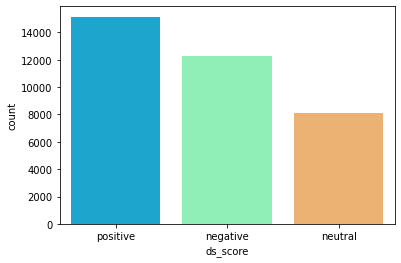

In [53]:
# plot a count plot on description score column
sns.countplot(df['ds_score'],palette='rainbow')

In the description 

there are approx

14000 positive statment

12000 negative statment

8000 neutral statment

In [55]:
fig = px.pie(df,names='ds_score',title='pie chart for sentiments ')
fig.show()

In the dataset 

description contains

42.6% positive statments

34.5% negtive statements

22.9% neutral statments

# Modelling on description 

In [56]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
X=df['Description']
y=df['ds_score']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=212)

LINEAR SUPPORT VECTOR MACHINE


In [62]:
%%time
# pipeline creation
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
# 1. tfidVectorization
# 2. linearSVC model
pip=Pipeline([('tidf',TfidfVectorizer()),('model',LinearSVC())])


# Fit the pipeline to the data
linear_svc=pip.fit(X_train,y_train)
# predict on test dataset
prediction=linear_svc.predict(X_test)
# print accuracy score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

accuracy_score: 93.58%
[[1129   43   62]
 [  21  761   17]
 [  56   29 1434]]
              precision    recall  f1-score   support

    negative       0.94      0.91      0.93      1234
     neutral       0.91      0.95      0.93       799
    positive       0.95      0.94      0.95      1519

    accuracy                           0.94      3552
   macro avg       0.93      0.94      0.93      3552
weighted avg       0.94      0.94      0.94      3552

CPU times: user 1.45 s, sys: 8.99 ms, total: 1.46 s
Wall time: 1.47 s


LOGISTIC REGRESSION


In [63]:
%%time
# pipeline creation 
from sklearn.linear_model import LogisticRegression
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pip=Pipeline([('tidf',CountVectorizer()),('model',LogisticRegression())])

# fit the pipeline to the train data
 
logistic=pip.fit(X_train,y_train)
# predict on test dataset
prediction=logistic.predict(X_test) 
#print accuracy
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test,prediction))
# print classification report
print(classification_report(y_test,prediction))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



accuracy_score: 93.38%
[[1118   55   61]
 [  15  772   12]
 [  60   32 1427]]
              precision    recall  f1-score   support

    negative       0.94      0.91      0.92      1234
     neutral       0.90      0.97      0.93       799
    positive       0.95      0.94      0.95      1519

    accuracy                           0.93      3552
   macro avg       0.93      0.94      0.93      3552
weighted avg       0.93      0.93      0.93      3552

CPU times: user 5.53 s, sys: 3.51 s, total: 9.04 s
Wall time: 5.14 s


MULTINOMIAL NAIVE BAYES


In [65]:
%%time
# pipeline creation 
from sklearn.naive_bayes import MultinomialNB
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
pip=Pipeline([('tidf',CountVectorizer()),('model',MultinomialNB())]) 
# fit the pipeline to the train data
multinomial=pip.fit(X_train,y_train)
#predict on test data
prediction=multinomial.predict(X_test)

#print accuracy
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test,prediction))
# print classification report
print(classification_report(y_test,prediction))

accuracy_score: 73.06%
[[ 914   60  260]
 [ 149  439  211]
 [ 211   66 1242]]
              precision    recall  f1-score   support

    negative       0.72      0.74      0.73      1234
     neutral       0.78      0.55      0.64       799
    positive       0.73      0.82      0.77      1519

    accuracy                           0.73      3552
   macro avg       0.74      0.70      0.71      3552
weighted avg       0.73      0.73      0.73      3552

CPU times: user 899 ms, sys: 1.87 ms, total: 901 ms
Wall time: 903 ms


BERNOULLI NAIVE BAYES


In [72]:

%%time
# pipeline creation 
from sklearn.naive_bayes import BernoulliNB
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB
pip=Pipeline([('tidf',CountVectorizer()),('model',BernoulliNB())]) 
# fit the pipeline to the train data
bernoulli=pip.fit(X_train,y_train)
#predict on test data
prediction=multinomial.predict(X_test)

#print accuracy
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test,prediction))
# print classification report
print(classification_report(y_test,prediction))


accuracy_score: 38.4%
[[ 351  778  105]
 [  74  670   55]
 [ 150 1026  343]]
              precision    recall  f1-score   support

    negative       0.61      0.28      0.39      1234
     neutral       0.27      0.84      0.41       799
    positive       0.68      0.23      0.34      1519

    accuracy                           0.38      3552
   macro avg       0.52      0.45      0.38      3552
weighted avg       0.56      0.38      0.37      3552

CPU times: user 5.3 s, sys: 40.3 ms, total: 5.34 s
Wall time: 6.07 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [73]:
%%time
# pipeline creation 
from sklearn.ensemble import GradientBoostingClassifier
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

pip=Pipeline([('tidf',CountVectorizer()),('model',GradientBoostingClassifier())]) 
# fit the pipeline to the train data
gradient=pip.fit(X_train,y_train)
#predict on test data
prediction=multinomial.predict(X_test)

#print accuracy
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test,prediction))
# print classification report
print(classification_report(y_test,prediction))

accuracy_score: 38.4%
[[ 351  778  105]
 [  74  670   55]
 [ 150 1026  343]]
              precision    recall  f1-score   support

    negative       0.61      0.28      0.39      1234
     neutral       0.27      0.84      0.41       799
    positive       0.68      0.23      0.34      1519

    accuracy                           0.38      3552
   macro avg       0.52      0.45      0.38      3552
weighted avg       0.56      0.38      0.37      3552

CPU times: user 30.8 s, sys: 6.77 s, total: 37.6 s
Wall time: 38.9 s


XGBOOST CLASSIFICATION MODEL


In [74]:
%%time
# pipeline creation 
from xgboost import XGBClassifier
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier
pip=Pipeline([('tidf',CountVectorizer()),('model',XGBClassifier())]) 
# fit the pipeline to the train data
xgb=pip.fit(X_train,y_train)
#predict on test data
prediction=multinomial.predict(X_test)

#print accuracy
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test,prediction))
# print classification report
print(classification_report(y_test,prediction))


accuracy_score: 38.4%
[[ 351  778  105]
 [  74  670   55]
 [ 150 1026  343]]
              precision    recall  f1-score   support

    negative       0.61      0.28      0.39      1234
     neutral       0.27      0.84      0.41       799
    positive       0.68      0.23      0.34      1519

    accuracy                           0.38      3552
   macro avg       0.52      0.45      0.38      3552
weighted avg       0.56      0.38      0.37      3552

CPU times: user 26.6 s, sys: 166 ms, total: 26.7 s
Wall time: 34.6 s


DECISION TREE CLASSIFICATION MODEL


In [75]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
pip=Pipeline([('tidf',CountVectorizer()),('model',DecisionTreeClassifier())]) 
# fit the pipeline to the train data
tree=pip.fit(X_train,y_train)
#predict on test data
prediction=multinomial.predict(X_test)

#print accuracy
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test,prediction))
# print classification report
print(classification_report(y_test,prediction))


accuracy_score: 38.4%
[[ 351  778  105]
 [  74  670   55]
 [ 150 1026  343]]
              precision    recall  f1-score   support

    negative       0.61      0.28      0.39      1234
     neutral       0.27      0.84      0.41       799
    positive       0.68      0.23      0.34      1519

    accuracy                           0.38      3552
   macro avg       0.52      0.45      0.38      3552
weighted avg       0.56      0.38      0.37      3552

CPU times: user 17.2 s, sys: 57.8 ms, total: 17.3 s
Wall time: 19.6 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [76]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier

from sklearn.neighbors import KNeighborsClassifier

pip=Pipeline([('tidf',CountVectorizer()),('model',KNeighborsClassifier())]) 
# fit the pipeline to the train data
knn=pip.fit(X_train,y_train)
#predict on test data
prediction=multinomial.predict(X_test)

#print accuracy
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test,prediction))
# print classification report
print(classification_report(y_test,prediction))



accuracy_score: 38.4%
[[ 351  778  105]
 [  74  670   55]
 [ 150 1026  343]]
              precision    recall  f1-score   support

    negative       0.61      0.28      0.39      1234
     neutral       0.27      0.84      0.41       799
    positive       0.68      0.23      0.34      1519

    accuracy                           0.38      3552
   macro avg       0.52      0.45      0.38      3552
weighted avg       0.56      0.38      0.37      3552

CPU times: user 5.6 s, sys: 82.6 ms, total: 5.68 s
Wall time: 7.52 s


In [83]:
# helper function for comparing models matric

def compare_models(models,names,X_train,y_train,X_test,y_test):
    # the libraries we need
    import sklearn.metrics as metrics

    for (model,name) in zip(models,names):
      print(name)
      # then predict on the test set
      y_pred =  model.predict(X_test)
      res = classification_report(y_test,y_pred)
      print("Classification Report \n",res)
      print("---------------------------------------------------------------------------------------")


In [84]:
# list of model objects
models= [linear_svc,logistic,multinomial,bernoulli, gradient, tree, xgb,knn ]
# list of model names
names = ['linear_svc', 'logistic','multinomial', 'bernoulli', 'gradient','tree','xgb','knn']
# print the comparison of models
compare_models(models,names,X_train,y_train,X_test,y_test)


linear_svc
Classification Report 
               precision    recall  f1-score   support

    negative       0.94      0.91      0.93      1234
     neutral       0.91      0.95      0.93       799
    positive       0.95      0.94      0.95      1519

    accuracy                           0.94      3552
   macro avg       0.93      0.94      0.93      3552
weighted avg       0.94      0.94      0.94      3552

---------------------------------------------------------------------------------------
logistic
Classification Report 
               precision    recall  f1-score   support

    negative       0.94      0.91      0.92      1234
     neutral       0.90      0.97      0.93       799
    positive       0.95      0.94      0.95      1519

    accuracy                           0.93      3552
   macro avg       0.93      0.94      0.93      3552
weighted avg       0.93      0.93      0.93      3552

----------------------------------------------------------------------------------

# working with test dataset

In [87]:
# Perforn the prediction on the test dataset
prediction=gradient.predict(X_test)
prediction

array(['negative', 'neutral', 'positive', ..., 'neutral', 'positive',
       'neutral'], dtype=object)

In [88]:
# creating a dataframe of predicted results 
data_frame=pd.DataFrame(prediction)

In [89]:
data_frame.head()

,0
0,negative
1,neutral
2,positive
3,positive
4,neutral


# Now working with headlines + description

In [91]:
# merge headlines and description of new dataset and name it info
df['info']=df['Headlines']+df['Description']
df.head()

,Headlines,Time,Description,ds_score,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,positive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,negative,Cramer's lightning round: I would own Teradyne...
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,positive,"Cramer's week ahead: Big week for earnings, ev..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,positive,IQ Capital CEO Keith Bliss says tech and healt...
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,negative,Wall Street delivered the 'kind of pullback I'...


In [92]:
# only keep info and time column . drop all remaining columns
df=df.drop(['Headlines','Description','ds_score'],axis=1)
df.head()

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
3,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
4,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
5,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...


In [93]:
# apply preprocessing on info column
df['info']=df['info'].apply(preprocessing_text)
df.head()

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...
3,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...
4,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...
5,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...


In [94]:
# analyze polarity score of values in info and  add new column of it in dataset
info_score=[]
for value in df['info'].values:
    info_score.append(analyzer.polarity_scores(value)['compound'])
df['info_score'] = info_score
df.head()

,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...,0.7964
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,0.0000
3,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...,0.3612
4,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,0.8625
5,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,-0.2263


In [95]:
# apply the function  which decides sentiment to  polarity score column
df['info_score']=df['info_score'].apply(get_score)
df.head()

,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...,positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,neutral
3,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...,positive
4,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,positive
5,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,negative


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



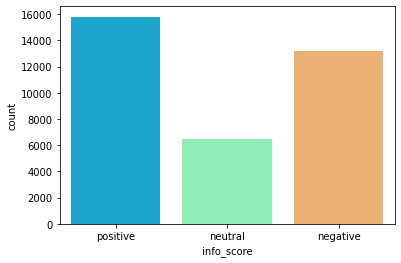

In [96]:
# perform count plot on info_score column
sns.countplot(df['info_score'],palette='rainbow')

In the info

there are approx

15500 positive statment

13000 negative statment

6500 neutral statment

In [97]:
# perform pie chart on info_score column
fig=px.pie(df,names='info_score',title='Pie  chart of different sentiments')
fig.show()

In the dataset

info contains

44.5% positive statments

37.2% negtive statements

18.3% neutral statments

# modeling on headlines + description

In [98]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
X=df['info']
y=df['info_score']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=212)

LINEAR SUPPORT VECTOR MACHINE


In [99]:

%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model


pip=Pipeline([('tidf',TfidfVectorizer()),('model',LinearSVC())])


# Fit the pipeline to the data
linear_svc1=pip.fit(X_train,y_train)
# predict on test dataset
prediction=linear_svc1.predict(X_test)
# print accuracy score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

accuracy_score: 90.6%
[[1192   39   85]
 [  38  547   49]
 [  75   48 1479]]
              precision    recall  f1-score   support

    negative       0.91      0.91      0.91      1316
     neutral       0.86      0.86      0.86       634
    positive       0.92      0.92      0.92      1602

    accuracy                           0.91      3552
   macro avg       0.90      0.90      0.90      3552
weighted avg       0.91      0.91      0.91      3552

CPU times: user 1.65 s, sys: 61.7 ms, total: 1.71 s
Wall time: 1.71 s


LOGISTIC REGRESSION


In [100]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pip=Pipeline([('tidf',TfidfVectorizer()),('model',LogisticRegression())])


# Fit the pipeline to the data
logistic_reg=pip.fit(X_train,y_train)
# predict on test dataset
prediction=logistic_reg.predict(X_test)
# print accuracy score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



accuracy_score: 86.68%
[[1142   54  120]
 [  79  473   82]
 [  89   49 1464]]
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      1316
     neutral       0.82      0.75      0.78       634
    positive       0.88      0.91      0.90      1602

    accuracy                           0.87      3552
   macro avg       0.86      0.84      0.85      3552
weighted avg       0.87      0.87      0.87      3552

CPU times: user 9.17 s, sys: 22.3 s, total: 31.4 s
Wall time: 17 s


MULTINOMIAL NAIVE BAYES


In [101]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
pip=Pipeline([('tidf',TfidfVectorizer()),('model',MultinomialNB())])


# Fit the pipeline to the data
multinomial1=pip.fit(X_train,y_train)
# predict on test dataset
prediction=multinomial1.predict(X_test)
# print accuracy score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

accuracy_score: 64.41%
[[ 827    0  489]
 [ 131   12  491]
 [ 151    2 1449]]
              precision    recall  f1-score   support

    negative       0.75      0.63      0.68      1316
     neutral       0.86      0.02      0.04       634
    positive       0.60      0.90      0.72      1602

    accuracy                           0.64      3552
   macro avg       0.73      0.52      0.48      3552
weighted avg       0.70      0.64      0.58      3552

CPU times: user 1.2 s, sys: 81.6 ms, total: 1.28 s
Wall time: 1.28 s


BERNOULLI NAIVE BAYES


In [102]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

pip=Pipeline([('tidf',TfidfVectorizer()),('model',BernoulliNB())])


# Fit the pipeline to the data
bernouli1=pip.fit(X_train,y_train)
# predict on test dataset
prediction=bernouli1.predict(X_test)
# print accuracy score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

accuracy_score: 68.58%
[[ 964   14  338]
 [ 172  148  314]
 [ 258   20 1324]]
              precision    recall  f1-score   support

    negative       0.69      0.73      0.71      1316
     neutral       0.81      0.23      0.36       634
    positive       0.67      0.83      0.74      1602

    accuracy                           0.69      3552
   macro avg       0.72      0.60      0.60      3552
weighted avg       0.70      0.69      0.66      3552

CPU times: user 1.24 s, sys: 49.7 ms, total: 1.29 s
Wall time: 1.29 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [103]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

pip=Pipeline([('tidf',TfidfVectorizer()),('model',GradientBoostingClassifier())])


# Fit the pipeline to the data
gradient1=pip.fit(X_train,y_train)
# predict on test dataset
prediction=gradient1.predict(X_test)
# print accuracy score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

accuracy_score: 76.94%
[[ 954   65  297]
 [   5  331  298]
 [  94   60 1448]]
              precision    recall  f1-score   support

    negative       0.91      0.72      0.81      1316
     neutral       0.73      0.52      0.61       634
    positive       0.71      0.90      0.79      1602

    accuracy                           0.77      3552
   macro avg       0.78      0.72      0.74      3552
weighted avg       0.78      0.77      0.77      3552

CPU times: user 1min 34s, sys: 10.1 s, total: 1min 44s
Wall time: 1min 44s


XGBOOST CLASSIFICATION MODEL


In [104]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier
pip=Pipeline([('tidf',TfidfVectorizer()),('model',XGBClassifier())])


# Fit the pipeline to the data
xgb1=pip.fit(X_train,y_train)
# predict on test dataset
prediction=xgb1.predict(X_test)
# print accuracy score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

accuracy_score: 68.47%
[[ 906    2  408]
 [   5   15  614]
 [  90    1 1511]]
              precision    recall  f1-score   support

    negative       0.91      0.69      0.78      1316
     neutral       0.83      0.02      0.05       634
    positive       0.60      0.94      0.73      1602

    accuracy                           0.68      3552
   macro avg       0.78      0.55      0.52      3552
weighted avg       0.75      0.68      0.63      3552

CPU times: user 43.2 s, sys: 82.5 ms, total: 43.3 s
Wall time: 43.6 s


DECISION TREE CLASSIFICATION MODEL


In [105]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier
pip=Pipeline([('tidf',TfidfVectorizer()),('model',DecisionTreeClassifier())])


# Fit the pipeline to the data
tree1=pip.fit(X_train,y_train)
# predict on test dataset
prediction=tree1.predict(X_test)
# print accuracy score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

accuracy_score: 83.92%
[[1024   18  274]
 [  14  610   10]
 [ 237   18 1347]]
              precision    recall  f1-score   support

    negative       0.80      0.78      0.79      1316
     neutral       0.94      0.96      0.95       634
    positive       0.83      0.84      0.83      1602

    accuracy                           0.84      3552
   macro avg       0.86      0.86      0.86      3552
weighted avg       0.84      0.84      0.84      3552

CPU times: user 24.3 s, sys: 63.3 ms, total: 24.3 s
Wall time: 24.3 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [106]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier
pip=Pipeline([('tidf',TfidfVectorizer()),('model',KNeighborsClassifier())])


# Fit the pipeline to the data
knn1=pip.fit(X_train,y_train)
# predict on test dataset
prediction=knn1.predict(X_test)
# print accuracy score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

accuracy_score: 57.01%
[[891 119 306]
 [217 183 234]
 [446 205 951]]
              precision    recall  f1-score   support

    negative       0.57      0.68      0.62      1316
     neutral       0.36      0.29      0.32       634
    positive       0.64      0.59      0.61      1602

    accuracy                           0.57      3552
   macro avg       0.52      0.52      0.52      3552
weighted avg       0.56      0.57      0.56      3552

CPU times: user 4.83 s, sys: 460 ms, total: 5.29 s
Wall time: 5.28 s


In [107]:
# helper function for comparing models matric
def compare_models(models,names,X_train,y_train,X_test,y_test):

    for (model,name) in zip(models,names):
      print(name)
      # then predict on the test set
      y_pred =  model.predict(X_test)
      res = classification_report(y_test,y_pred)
      print("Classification Report \n",res)
      print("---------------------------------------------------------------------------------------")


In [108]:
# list of model objects
models= [linear_svc1,logistic_reg,multinomial1,bernouli1, gradient1, tree1, xgb1,knn1]
# list of model names
names = ['linear_svc', 'logistic','multinomial', 'bernoulli', 'gradient','tree','xgb','knn']
# print the comparison of models
compare_models(models,names,X_train,y_train,X_test,y_test)


linear_svc
Classification Report 
               precision    recall  f1-score   support

    negative       0.91      0.91      0.91      1316
     neutral       0.86      0.86      0.86       634
    positive       0.92      0.92      0.92      1602

    accuracy                           0.91      3552
   macro avg       0.90      0.90      0.90      3552
weighted avg       0.91      0.91      0.91      3552

---------------------------------------------------------------------------------------
logistic
Classification Report 
               precision    recall  f1-score   support

    negative       0.87      0.87      0.87      1316
     neutral       0.82      0.75      0.78       634
    positive       0.88      0.91      0.90      1602

    accuracy                           0.87      3552
   macro avg       0.86      0.84      0.85      3552
weighted avg       0.87      0.87      0.87      3552

----------------------------------------------------------------------------------

# working with test data

In [109]:
# Perforn the prediction on the test dataset
prediction=linear_svc1.predict(X_test)
prediction

array(['negative', 'negative', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [110]:
# creating a dataframe of predicted results 
data_frame1=pd.DataFrame(prediction)

In [112]:
data_frame1.head()

,0
0,negative
1,negative
2,positive
3,positive
4,negative


# now working on headlines

In [114]:
data.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."


In [115]:
# from the dataset you have copied before delete the column of description
data.drop(['Description'],axis=1)

,Headlines,Time
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020"
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020"
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020"
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020"
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020"
...,...,...
3075,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017"
3076,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018"
3077,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017"
3078,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017"


In [117]:
# remane the date column in gaurdian headlines dataset  to time
gurdian.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [ ]:
# cancatenate the gaurdian headlines dataset and  copy of datasetto get all headlines together


,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [118]:
# check the shape of all headlines dataset
gurdian.shape

(17800, 2)

In [119]:
#apply preprocessin to the headlines column in the new dataset
gurdian['Headlines']=gurdian['Headlines'].apply(preprocessing_text)

In [120]:
# analyze polarity score of values in headlines and  add new column of it in dataset
h1_score=[]
for value in gurdian['Headlines'].values:
    h1_score.append(analyzer.polarity_scores(value)['compound'])
gurdian['headline_score'] = h1_score
gurdian


,Time,Headlines,headline_score
0,18-Jul-20,johnson ask santa christma recoveri,0.0000
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...,-0.8860
2,18-Jul-20,five key area sunak must tackl serv econom rec...,0.0000
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,-0.5423
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...,-0.4939
...,...,...,...
17795,17-Dec-17,invest solar energi creat bright futur africa,0.4404
17796,17-Dec-17,poundland supplier hit insur downgrad,0.0000
17797,17-Dec-17,cryptocurr citi watchdog investig new fundrais...,0.0000
17798,17-Dec-17,unilev sell household name spread kkr £6bn,0.0000


In [122]:
# apply the function  which decides sentiment to  polarity score column
gurdian['headline_score']=gurdian['headline_score'].apply(get_score)
gurdian.head()

,Time,Headlines,headline_score
0,18-Jul-20,johnson ask santa christma recoveri,neutral
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...,negative
2,18-Jul-20,five key area sunak must tackl serv econom rec...,neutral
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,negative
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...,negative


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



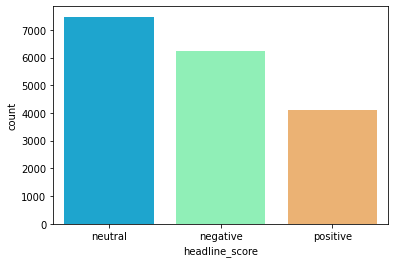

In [123]:
#perform countplot on headline score column

sns.countplot(gurdian['headline_score'],palette='rainbow')

In the headlines

there are approx

14000 positive statment

16000 negative statment

24000 neutral statment

In [124]:
#perform pie digram on headline score column

fig=px.pie(gurdian,names='headline_score',title='Pie chart of different sentiments')
fig.show()

In the dataset

headlines contains

24.8% positive statments

30.3% negtive statements

44.9% neutral statments

# Modeling on headlines

In [125]:
gurdian.columns

Index(['Time', 'Headlines', 'headline_score'], dtype='object')

In [126]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
X=gurdian['Headlines']
y=gurdian['headline_score']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=212)

LINEAR SUPPORT VECTOR MACHINE

In [127]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model


pip=Pipeline([('tidf',TfidfVectorizer()),('model',LinearSVC())])


# Fit the pipeline to the data
linear_svc2=pip.fit(X_train,y_train)
# predict on test dataset
prediction=linear_svc2.predict(X_test)
# print accuracy score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

accuracy_score: 94.49%
[[556  39  23]
 [  3 739   1]
 [ 17  15 387]]
              precision    recall  f1-score   support

    negative       0.97      0.90      0.93       618
     neutral       0.93      0.99      0.96       743
    positive       0.94      0.92      0.93       419

    accuracy                           0.94      1780
   macro avg       0.95      0.94      0.94      1780
weighted avg       0.95      0.94      0.94      1780

CPU times: user 411 ms, sys: 33.9 ms, total: 445 ms
Wall time: 447 ms


LOGISTIC REGRESSION

In [128]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression

pip=Pipeline([('tidf',TfidfVectorizer()),('model',LogisticRegression())])


# Fit the pipeline to the data
logistic_reg2=pip.fit(X_train,y_train)
# predict on test dataset
prediction=logistic_reg2.predict(X_test)
# print accuracy score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

accuracy_score: 89.89%
[[520  74  24]
 [  4 738   1]
 [ 24  53 342]]
              precision    recall  f1-score   support

    negative       0.95      0.84      0.89       618
     neutral       0.85      0.99      0.92       743
    positive       0.93      0.82      0.87       419

    accuracy                           0.90      1780
   macro avg       0.91      0.88      0.89      1780
weighted avg       0.90      0.90      0.90      1780

CPU times: user 3.41 s, sys: 19.3 s, total: 22.7 s
Wall time: 11.9 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MULTINOMIAL NAIVE BAYES


In [129]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
pip=Pipeline([('tidf',TfidfVectorizer()),('model',MultinomialNB())])


# Fit the pipeline to the data
multinomial2=pip.fit(X_train,y_train)
# predict on test dataset
prediction=multinomial2.predict(X_test)
# print accuracy score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

accuracy_score: 79.61%
[[536  71  11]
 [ 56 683   4]
 [118 103 198]]
              precision    recall  f1-score   support

    negative       0.75      0.87      0.81       618
     neutral       0.80      0.92      0.85       743
    positive       0.93      0.47      0.63       419

    accuracy                           0.80      1780
   macro avg       0.83      0.75      0.76      1780
weighted avg       0.81      0.80      0.78      1780

CPU times: user 448 ms, sys: 12.1 ms, total: 460 ms
Wall time: 459 ms


BERNOULLI NAIVE BAYES


In [130]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB
pip=Pipeline([('tidf',TfidfVectorizer()),('model',BernoulliNB())])

# Fit the pipeline to the data
bernouli2=pip.fit(X_train,y_train)
# predict on test dataset
prediction=bernouli2.predict(X_test)
# print accuracy score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

accuracy_score: 85.11%
[[540  42  36]
 [ 62 670  11]
 [ 82  32 305]]
              precision    recall  f1-score   support

    negative       0.79      0.87      0.83       618
     neutral       0.90      0.90      0.90       743
    positive       0.87      0.73      0.79       419

    accuracy                           0.85      1780
   macro avg       0.85      0.83      0.84      1780
weighted avg       0.85      0.85      0.85      1780

CPU times: user 287 ms, sys: 1.52 ms, total: 289 ms
Wall time: 292 ms


GRADIENT BOOSTING CLASSIFICATION MODEL


In [131]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

pip=Pipeline([('tidf',TfidfVectorizer()),('model',GradientBoostingClassifier())])

# Fit the pipeline to the data
gradient2=pip.fit(X_train,y_train)
# predict on test dataset
prediction=gradient2.predict(X_test)
# print accuracy score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

accuracy_score: 80.73%
[[440 152  26]
 [  1 741   1]
 [ 30 133 256]]
              precision    recall  f1-score   support

    negative       0.93      0.71      0.81       618
     neutral       0.72      1.00      0.84       743
    positive       0.90      0.61      0.73       419

    accuracy                           0.81      1780
   macro avg       0.85      0.77      0.79      1780
weighted avg       0.84      0.81      0.80      1780

CPU times: user 14.5 s, sys: 10.3 s, total: 24.8 s
Wall time: 24.9 s


XGBOOST CLASSIFICATION MODEL


In [132]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier
pip=Pipeline([('tidf',TfidfVectorizer()),('model',XGBClassifier())])

# Fit the pipeline to the data
xgb2=pip.fit(X_train,y_train)
# predict on test dataset
prediction=xgb2.predict(X_test)
# print accuracy score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

accuracy_score: 77.58%
[[395 196  27]
 [  1 741   1]
 [ 21 153 245]]
              precision    recall  f1-score   support

    negative       0.95      0.64      0.76       618
     neutral       0.68      1.00      0.81       743
    positive       0.90      0.58      0.71       419

    accuracy                           0.78      1780
   macro avg       0.84      0.74      0.76      1780
weighted avg       0.82      0.78      0.77      1780

CPU times: user 8.26 s, sys: 43.3 ms, total: 8.3 s
Wall time: 8.27 s


DECISION TREE CLASSIFICATION MODEL


In [133]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier

pip=Pipeline([('tidf',TfidfVectorizer()),('model',DecisionTreeClassifier())])

# Fit the pipeline to the data
tree2=pip.fit(X_train,y_train)
# predict on test dataset
prediction=tree2.predict(X_test)
# print accuracy score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))


accuracy_score: 93.31%
[[545  21  52]
 [  3 737   3]
 [ 35   5 379]]
              precision    recall  f1-score   support

    negative       0.93      0.88      0.91       618
     neutral       0.97      0.99      0.98       743
    positive       0.87      0.90      0.89       419

    accuracy                           0.93      1780
   macro avg       0.92      0.93      0.92      1780
weighted avg       0.93      0.93      0.93      1780

CPU times: user 4.58 s, sys: 36.7 ms, total: 4.61 s
Wall time: 4.59 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [134]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier

pip=Pipeline([('tidf',TfidfVectorizer()),('model',KNeighborsClassifier())])

# Fit the pipeline to the data
knn2=pip.fit(X_train,y_train)
# predict on test dataset
prediction=knn2.predict(X_test)
# print accuracy score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))


accuracy_score: 57.58%
[[392 186  40]
 [221 483  39]
 [108 161 150]]
              precision    recall  f1-score   support

    negative       0.54      0.63      0.59       618
     neutral       0.58      0.65      0.61       743
    positive       0.66      0.36      0.46       419

    accuracy                           0.58      1780
   macro avg       0.59      0.55      0.55      1780
weighted avg       0.59      0.58      0.57      1780

CPU times: user 826 ms, sys: 65.1 ms, total: 891 ms
Wall time: 883 ms


In [135]:
# helper function for comparing models matric
def compare_models(models,names,X_train,y_train,X_test,y_test):

    for (model,name) in zip(models,names):
      print(name)
      # then predict on the test set
      y_pred =  model.predict(X_test)
      res = classification_report(y_test,y_pred)
      print("Classification Report \n",res)
      print("---------------------------------------------------------------------------------------")


In [136]:
# list of model objects
models= [linear_svc2,logistic_reg2,multinomial2,bernouli2, gradient2, tree2, xgb2,knn2]
# list of model names
names = ['linear_svc', 'logistic','multinomial', 'bernoulli', 'gradient','tree','xgb','knn']
# print the comparison of models
compare_models(models,names,X_train,y_train,X_test,y_test)

linear_svc
Classification Report 
               precision    recall  f1-score   support

    negative       0.97      0.90      0.93       618
     neutral       0.93      0.99      0.96       743
    positive       0.94      0.92      0.93       419

    accuracy                           0.94      1780
   macro avg       0.95      0.94      0.94      1780
weighted avg       0.95      0.94      0.94      1780

---------------------------------------------------------------------------------------
logistic
Classification Report 
               precision    recall  f1-score   support

    negative       0.95      0.84      0.89       618
     neutral       0.85      0.99      0.92       743
    positive       0.93      0.82      0.87       419

    accuracy                           0.90      1780
   macro avg       0.91      0.88      0.89      1780
weighted avg       0.90      0.90      0.90      1780

----------------------------------------------------------------------------------

# now working with test data

In [137]:
# Perforn the prediction on the test dataset
prediction=linear_svc2.predict(X_test)
prediction

array(['negative', 'neutral', 'negative', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [138]:
# creating a dataframe of predicted results 
data_frame_2=pd.DataFrame(prediction)

In [139]:
data_frame_2.head()

,0
0,negative
1,neutral
2,negative
3,negative
4,negative


# Prediction

you can check the result on real time news headlines

Here i have used two fiancial news headlines

and predicted its sentiment

You can try more 

In [140]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = linear_svc2.predict(sent1)
y_predict

array(['negative'], dtype=object)

In [141]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = linear_svc2.predict(sent2)
y_predict

array(['positive'], dtype=object)

# Conclusion

We learn about NLTK, sentiment analysis in this assigment.

we conclude that using nltk it is easy to classify financial news and more we improve the traning data more we can get accurate


#Congratulation for completing the assignment.


You have learned a lot while doing this assignment.